In [747]:
#default Values for dropdowns
player1 = 'Erling Haaland'
player2 = 'Mohamed Salah'
ATT1 = 'Goals'
ATT2 = 'Shots'
ATT3 = 'Assists'
ATT4 = 'Tackles'
ATT5 = 'Shots on Target'
ATT6 = 'Goals Per Shot'
ATT7 = 'Expected Goals'
ATT8 = 'Expected Assists'

In [748]:
#imported libraries
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy import stats
from matplotlib.cm import get_cmap
from mplsoccer import Radar, grid, PyPizza, Pitch, VerticalPitch, Sbopen, FontManager

In [749]:
#fonts
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [750]:
#read in Premier League Data
df = pd.read_csv('C:/Users/Nahim/Desktop/FP/FP_DATA_ALL.csv', encoding='latin-1')

In [751]:
#rename data columns
df = df.rename(columns={'Gls': 'Goals', 'Sh':'Shots', 'SoT':'Shots on Target', 'SoT%':'Shots on Target %', 
                        'Sh/90':'Shots Per 90', 'SoT/90':'Shots on Target Per 90', 'G/Sh':'Goals Per Shot',
                         'G/SoT':'Goals Per Shot on Target', 'Dist':'Average Distance of Shot', 'FK':'Freekick Shots',
                         'PK':'Penalty Kicks Made', 'Pen':'Penalty Kicks Attempted', 'xG':'Expected Goals',
                         'npxG':'Non-Penalty Expected Goals', 'npxG/Sh':'Non-Penalty Expected Goals Per Shot', 
                         'Tkl': 'Tackles', 'TklW': 'Tackles Won', 'Def 3rd': 'Tackles in Defensive 3rd', 
                         'Mid 3rd': 'Tackles in Middle 3rd', 'Att 3rd': 'Tackles in Attacking 3rd', 
                         'TklvD': 'Dribblers Tackled', 'Att': 'Tackles + Dribbled Past', 'Tkl%': '% of Dribblers Tackled', 
                         'Past': 'Dribbles Past', 'Blocks': 'Total Blocks', 'ShBlock': 'Shots Blocked', 'PassBlock': 'Passes Blocked', 
                         'Int': 'Interceptions', 'Tkl+Int': 'Tackles + Interceptions', 'Clr': 'Clearances', 
                         'Err': 'Errors Leading to Opponent Shot', 'Cmp': 'Passes Completed', 'PAtt': 'Pases Attempted', 
                         'Cmp%': 'Pass Completion %', 'TotDist': 'Total Distance of Passes', 
                         'PrgDist': 'Progressive Distance of Passes', 'SCmp': 'Short Passes Completed', 
                         'SAtt': 'Short Passes Attempted', 'SCmp%': 'Short Pass Completion %', 'MCmp': 'Medium Passes Completed', 
                         'MAtt': 'Medium Passes Attempted', 'MCmp%': 'Medium Pass Completion %', 'LCmp': 'Long Passes Completed', 
                         'LAtt': 'Long Passes Attempted', 'LCmp%': 'Long Pass Completion %', 
                         'Ast': 'Assists', 'xAG': 'Expected Assisted Goals', 'xA': 'Expected Assists', 
                         'KP': 'Passes Leading to Shot', '3-Jan': 'Passes Into Final Third', 'PPA': 'Passes Into Penalty Box', 
                         'CrsPA': 'Crosses Into Penalty Box', 'Prog': 'Progressive Passes'})

In [752]:
#datafram to store all league data for coxcomb percentile calculations
coxcomb_df = df.copy()

In [753]:
#current dataframe set to only two players we're looking at
df = df[(df['Player'] == player1) | (df['Player'] == player2)].reset_index()

In [754]:
#data fram to hold team info
team_df = df.copy()

In [755]:
#sets the team and stores it in variable to display as text
for players in team_df.index:
    if df['Player'][players] == player1:
        player1_team = team_df['Squad'][players]
    elif df['Player'][players] == player2:
        player2_team = team_df['Squad'][players]

In [756]:
#drop unencessary columns
df = df.drop(['index', 'ï»¿Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born'], axis=1)

In [757]:
#create array for chosen parameters
params = [ATT1, ATT2, ATT3, ATT4, ATT5, ATT6, ATT7, ATT8]

In [758]:
#sets lower and higher range of radar chart
#puts players values for chosen parameters in array
lower_range = []
higher_range = []
player1_values = []
player2_values = []
lower_is_better = ['Errors']
#loops through parameters array and adds data and range for each statistic
for x in params:
    a = min(df[params][x])
    a = a - (a * 0.25)
    
    b = max(df[params][x])
    b = b + (b * (0.25))
    
    lower_range.append(a)
    higher_range.append(b)

for param in params:
    player1_values.append(df[param].values[0])
    player2_values.append(df[param].values[1])

In [759]:
#function to plot the radar chart
def plot_radar(lower_range, higher_range, lower_is_better, player1_values, player2_values, 
               player1, player2, player1_team, player2_team):
    #intantiates radar object
    radar = Radar(params, lower_range, higher_range,
                  lower_is_better=lower_is_better,
                  # no rounding for any statistics
                  round_int=[False]*len(params),
                  num_rings=4,  # parameters for the number of rings of circle
                  ring_width=1, center_circle_radius=1)  #sets ring width and radius for the circle in center
    
    # creating the radar using the grid function imported from mplsoccer library
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                    title_space=0, endnote_space=0, grid_key='radar', axis=False)

    # plots the radar
    radar.setup_axis(ax=axs['radar'])  # creates axis
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#DDDED7', edgecolor='#B5B7AA')  #sets color of inner circles
    radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=axs['radar'],  #input data arrays for each player
                                            kwargs_radar={'facecolor': '#0E8CF3', 'alpha': 0.6}, #sets color for first player
                                            kwargs_compare={'facecolor': '#DD341B', 'alpha': 0.6}) #sets color for second player
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output #sets transperency to 0.6
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,  #styling for range labels parameter labels
                                           fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                           fontproperties=robotto_thin.prop)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                         c='#2442BA', edgecolors='#0B30C4', marker='o', s=150, zorder=2) #styling for dots at points
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                         c='#F40A0A', edgecolors='#F40A0A', marker='o', s=150, zorder=2)

    #styling and positioning for titles and endnote
    endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: Rami Moghadam || Data From: FBRef and Statsbomb', fontsize=15,
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
    title1_text = axs['title'].text(0.01, 0.65, player1, fontsize=25, color='#F40A0A',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    title2_text = axs['title'].text(0.01, 0.25, player1_team, fontsize=20,
                                    fontproperties=robotto_thin.prop,
                                    ha='left', va='center', color='#F40A0A')
    title3_text = axs['title'].text(0.99, 0.65, player2, fontsize=25,
                                    fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#2442BA')
    title4_text = axs['title'].text(0.99, 0.25, player2_team, fontsize=20,
                                    fontproperties=robotto_thin.prop,
                                    ha='right', va='center', color='#2442BA')

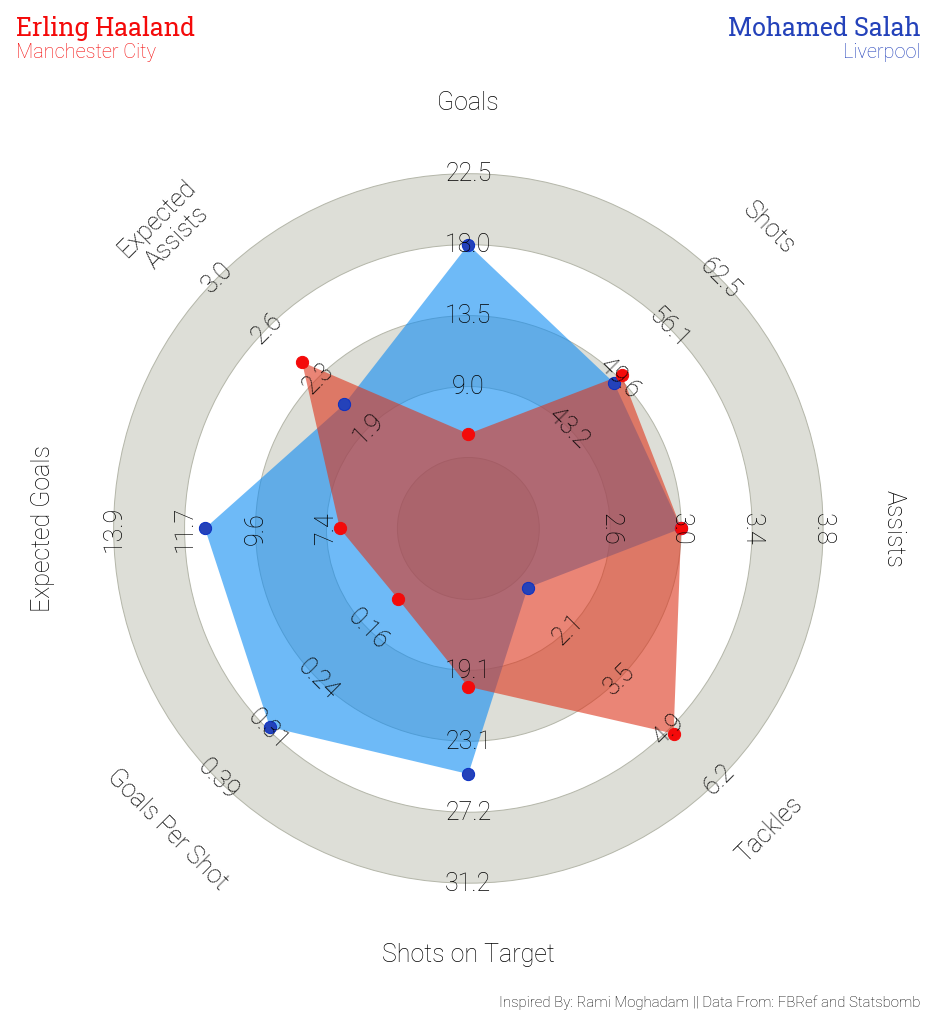

In [760]:
plot_radar(lower_range, higher_range, lower_is_better, player1_values, player2_values, 
               player1, player2, player1_team, player2_team)

In [761]:
player1_coxcomb_values = []
player2_coxcomb_values = []

for x in range(len(params)):
    player1_coxcomb_values.append(math.floor(stats.percentileofscore(coxcomb_df[params[x]],player1_values[x])))
    player2_coxcomb_values.append(math.floor(stats.percentileofscore(coxcomb_df[params[x]],player2_values[x])))

In [762]:
params_offset = []
for x in range(len(params)):
    if(abs(player1_coxcomb_values[x]-player2_coxcomb_values[x]) > 7):
        params_offset.append(False)
    else:
        params_offset.append(True)

In [763]:
def plot_coxcomb(params, params_offset, player1_coxcomb_values, player2_coxcomb_values, 
                 player1, player2, player1_team, player2_team):
    # create class for coxcomb chart
    coxcomb = PyPizza(
        params=params,                  # takes in the parameters that are passed in function (attributes)
        background_color="#EBEBE9",     # sets the bg color
        straight_line_color="#222222",  # sets the colors of lines on chart
        straight_line_lw=1,             # sets with of lines on chart
        last_circle_lw=1,               # sets width of line of circle
        last_circle_color="#222222",    # sets color of the outer circle
        other_circle_ls="-.",           # sets style for other circle
        other_circle_lw=1               # sets width for other circle
    )

    # plots the coxcomb chart
    fig, ax = coxcomb.make_pizza(
        player1_coxcomb_values,                     # takes in the first players list of values
        compare_values=player2_coxcomb_values,    # takes in the second players list of values to compare
        figsize=(15, 15),             # sets the size of our chart
        kwargs_slices=dict(
            facecolor="#1A78CF", edgecolor="#222222",
            zorder=2, linewidth=1
        ),                          # properties of the first players slices, 
                                    #color, edgecolor, zorder, and the width of line drawing it
        kwargs_compare=dict(
            facecolor="#FF0000", edgecolor="#222222",
            zorder=2, linewidth=1,  #properties of the second players slices
        ),
        kwargs_params=dict(
            color="#000000", fontsize=18,
            fontproperties=robotto_bold.prop, va="center", 
            bbox=dict(edgecolor="#FFFFFF00", facecolor="#FFFFFF00", boxstyle="round,pad=0.2", lw=1)
        ),                          # properties for the labels of the attributes
        kwargs_values=dict(
            color="#000000", fontsize=18,
            fontproperties=serif_regular.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        ),                          # properties of the number labels for the slices for player 1
        kwargs_compare_values=dict(
            color="#FFFFFF", fontsize=18, fontproperties=serif_regular.prop, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF0000", boxstyle="round,pad=0.2", lw=1)
        ),                          # properties of the number labels for the slices for player 2
    )


    # offsets the slice number labels if they're going to overlap to avoid occlusion
    coxcomb.adjust_texts(params_offset, offset=-0.14, adj_comp_values=True)
    
    fig.text(0.03, 0.99, player1, fontsize=25, color='#F40A0A',
            fontproperties=robotto_bold.prop, ha='left', va='center')
    fig.text(0.03, 0.96, player1_team, fontsize=20,
                                    fontproperties=robotto_thin.prop,
                                    ha='left', va='center', color='#F40A0A')
    fig.text(0.97, 0.99, player2, fontsize=25,
                                    fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#2442BA')
    fig.text(0.97, 0.96, player2_team, fontsize=20,
                                    fontproperties=robotto_thin.prop,
                                    ha='right', va='center', color='#2442BA')
    
    # title
    fig.text(
        0.515, 0.99,
        "Percentile Rank Chart",
        size=28,
        ha="center", fontproperties=robotto_bold.prop, color="#000000"
    )

    # credits and inspos
    CREDIT_1 = "Data from FBRef"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc, @Soumyaj15209314"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
        fontproperties=robotto_thin.prop, color="#000000",
        ha="right"
    )

    plt.show()

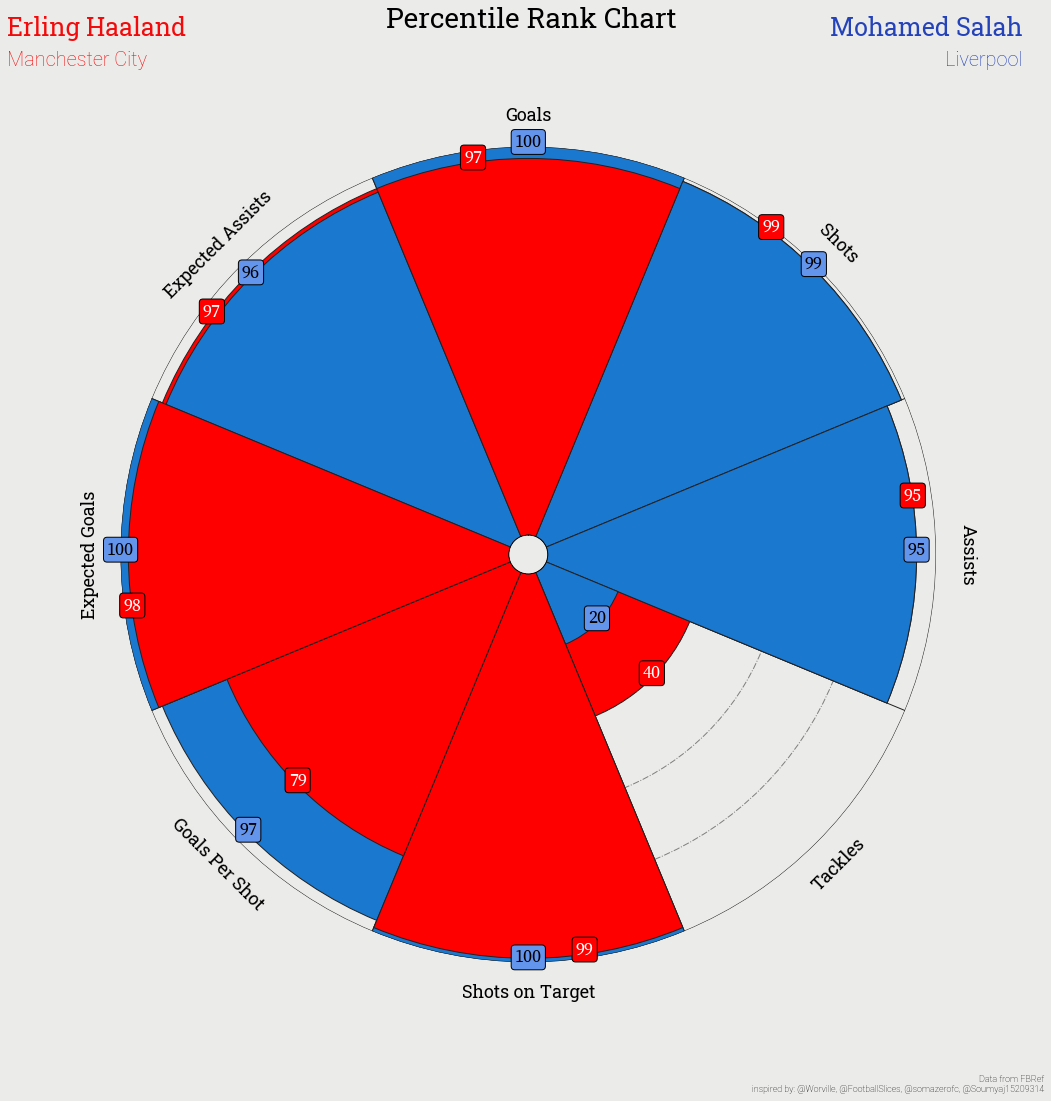

In [764]:
plot_coxcomb(params, params_offset, player1_coxcomb_values, player2_coxcomb_values, 
                 player1, player2, player1_team, player2_team)

In [765]:
#using Statbombs free game data, I chose random games
#in random competition and used their event data as the
#(where actions like passes, shots, goals) happened
#and set it as the data for the players for the heat map
random_comp = sb.competitions()  #gets all free competition data
random_match_list = [] #turns it into a list
random_match_list = random_comp.values.tolist()
random_choice = random.choice(random_match_list) # chososes random competition from random season
random_matches = sb.matches(competition_id=43, season_id=3)
random_matches = sb.matches(random_choice[0], random_choice[1])
random_data = [] #puts all matches from said competition into a list
for x in range(len(random_matches)):
    random_data.append(random_matches['match_id'][x])
random_game = random.choice(random_data)
random_game2 = random.choice(random_data)

In [766]:
#chooses 2 random games for each player
player1_eventdata_simulated=sb.events(match_id=random_game)
player2_eventdata_simulated=sb.events(match_id=random_game2)

In [767]:
#sets up styles and drawing for pitch
pitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=2)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)

In [768]:
#two lists to hold player data for each player
p1_locations = []
p2_locations = []

for x in range(len(player1_eventdata_simulated)):
    p1_locations.append(player1_eventdata_simulated['location'][x])
    
for x in range(len(player2_eventdata_simulated)):
    p2_locations.append(player2_eventdata_simulated['location'][x])

In [769]:
#add the location data to a data frame and drop any blank fields
p1_df2 = pd.DataFrame(p1_locations)
p1_df2 = p1_df2.dropna().reset_index(drop=True)

p2_df2 = pd.DataFrame(p2_locations)
p2_df2 = p2_df2.dropna().reset_index(drop=True)

In [770]:
#seperates x and y into two columns
p1_df3 = pd.DataFrame(p1_df2[0].to_list(), columns=['x','y'])
p2_df3 = pd.DataFrame(p2_df2[0].to_list(), columns=['x','y'])

In [771]:
#removed data that happens before the 75 yard mark
#because I wanted to portray shot data
#whereas this is data of all action on the field. 
#so to simulate shot data I only took actions in the final third
for x in range(len(p1_df3)):
    if p1_df3['x'][x] <= 75.0:
        p1_df3 = p1_df3.drop(labels=x, axis=0)

for x in range(len(p2_df3)):
    if p2_df3['x'][x] <= 75.0:
        p2_df3 = p2_df3.drop(labels=x, axis=0)

In [772]:
# seperate the actions for each players into two data frames
df_player1 = p1_df3.copy()
df_player2 = p2_df3.copy()
#in soccer data is collected left to right, thus to have the data of both players
#on one field one team must have their data flipped
df_player1['x'] = pitch.dim.right - df_player1.x

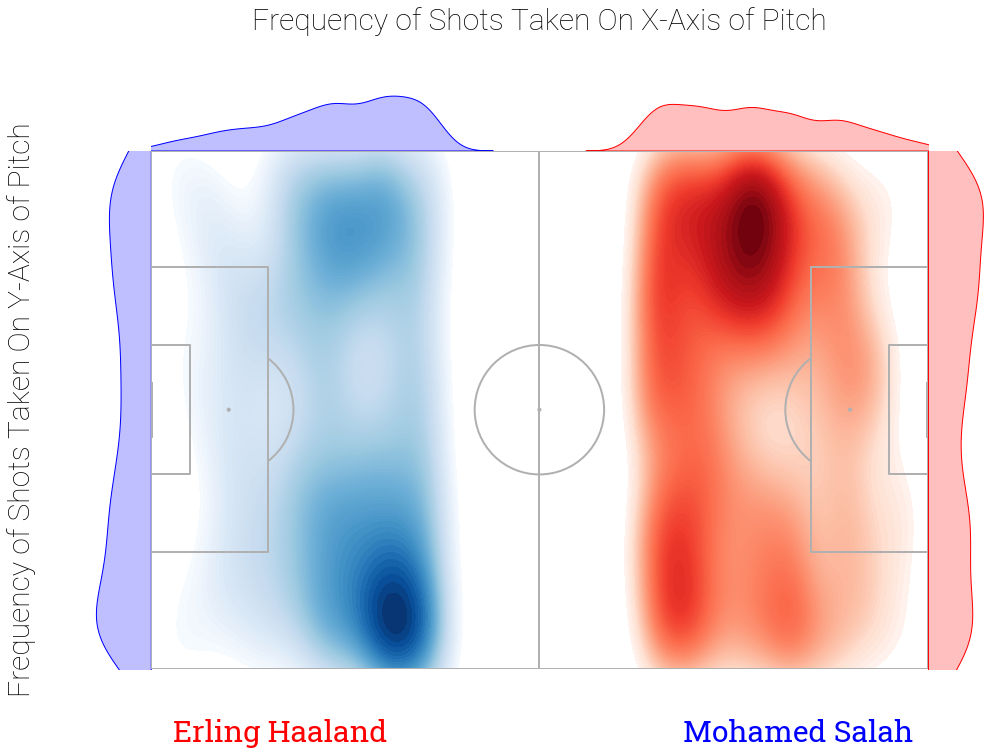

In [773]:
#plots the heatmap itself
fig, axs = pitch.jointgrid(figheight=10, left=None, bottom=0.075, grid_height=0.8,
                           axis=False,
                           title_height=0, endnote_height=0)
# adds extra levels, sets colors, player data (which player), colors, fill or no fill
kde1 = pitch.kdeplot(df_player1.x, df_player1.y, ax=axs['pitch'], cmap='Blues', levels=75, fill=True)
kde2 = pitch.kdeplot(df_player2.x, df_player2.y, ax=axs['pitch'], cmap='Reds', levels=75, fill=True)
# kdeplot on marginal axes which creates the histograms on the side
team1_hist_y = sns.kdeplot(y=df_player1.y, ax=axs['left'], color='blue', fill=True)
team1_hist_x = sns.kdeplot(x=df_player1.x, ax=axs['top'], color='blue', fill=True)
team2_hist_x = sns.kdeplot(x=df_player2.x, ax=axs['top'], color='red', fill=True)
team2_hist_y = sns.kdeplot(y=df_player2.y, ax=axs['right'], color='red', fill=True)
#text for title and labels and player names
txt1 = axs['pitch'].text(x=20, y=90, s=player1, fontproperties=robotto_bold.prop, color='red',
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=100, y=90, s=player2, fontproperties=robotto_bold.prop, color='blue',
                         ha='center', va='center', fontsize=30)
txt3 = axs['pitch'].text(x=60, y=-20, s="Frequency of Shots Taken On X-Axis of Pitch", fontproperties=robotto_thin.prop, color='black',
                         ha='center', va='center', fontsize=30)
txt3 = axs['pitch'].text(x=-20, y=40, s="Frequency of Shots Taken On Y-Axis of Pitch", fontproperties=robotto_thin.prop, color='black',
                         ha='center', va='center', fontsize=30, rotation=90)